**Chapter 13 - Convolutional Neural Networks**

**The Architecture of the Visual Cortex**

David H. Hubel and Torsten Wiesel
 - http://goo.gl/VLxXf9 (1958)
 - http://goo.gl/OYuFUZ (1959)
 
 Many neurons in the visual cortex have a small local receptive field
  - Some neurons react only to images of horizontal lines
  - Others react only to lines with different orientations
  - Some neurons have large receptive fields
    - more complex patterns that are combinations of the lower-level patterns


In [21]:
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image
from google.colab import files

uploaded = files.upload()

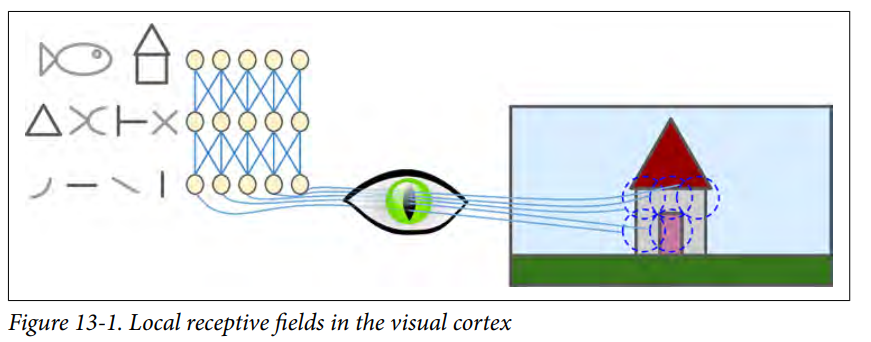

In [2]:
im = Image.open(BytesIO(uploaded['Figure13-1.PNG']))
                                 
display(im)

visual cortex => neocognitron (1980, http://goo.gl/XwiXs9) => convolutional neural networks

Yann LeCun, Leon Bottou, Yoshua Bengio, and Patrick Haffner
 - LeNet-5 architecture (1998, http://goo.gl/A347S4)
 - fully connected layers
 - sigmoid activation functions
 - **convolutional layers**
 - **pooling layers**

Why not simply use a regular deep neural network with fully connectd layers for image recognition tasks?
 - large images => huge number of parameters it requires
  - 100 x 100 image has 10,000 pixels
  - if the first layer has just 1,000 neurons
  - total 10 million connections (10,000,000)
 - CNNs solve this problem using partially connected layers

**Convolutional Layer**

Saving Figure13-2.PNG to Figure13-2.PNG


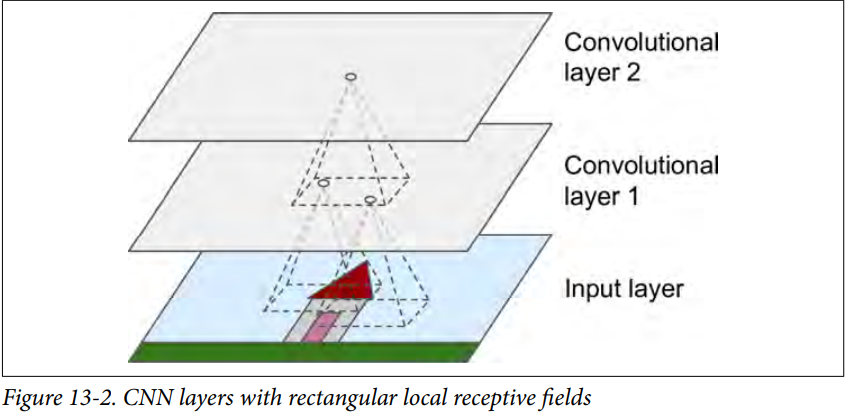

In [3]:
uploaded = files.upload()
im = Image.open(BytesIO(uploaded['Figure13-2.PNG']))
                                 
display(im)

A neuron located in **row $i$, column $j$** of a given layer
  - is connected to the outputs of the neurons in the previous layer 
  - located in **rows $i$ to $i + f_h -1$**, 
  - **columns $j$ to $j + f_w -1$** 
  - where $f_h$ and $f_w$ are the height and width of the receptive field.
  
Zero Padding
  - In order for a layer to have the same height and width as the previous layer
  - Add zeros around the inputs 
  
Stride
  - the distance betwwen two consecutive receptive fields   

Saving Figure13-3.PNG to Figure13-3.PNG


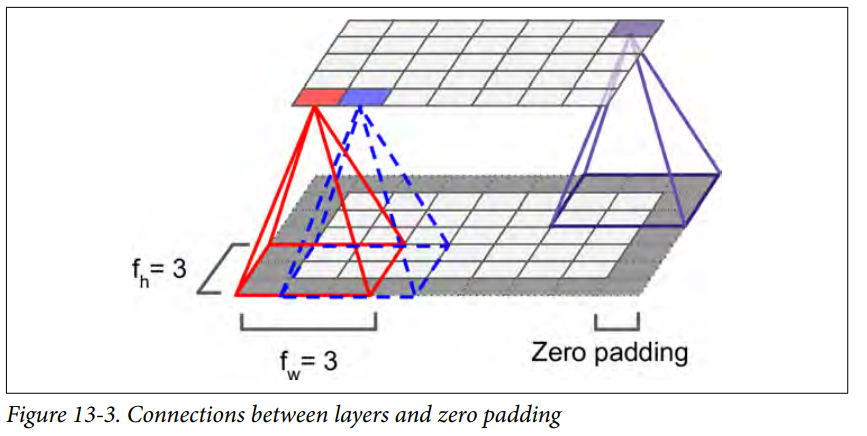

In [4]:
uploaded = files.upload()
im = Image.open(BytesIO(uploaded['Figure13-3.PNG']))
                                 
display(im)

Saving Figure13-4.PNG to Figure13-4.PNG


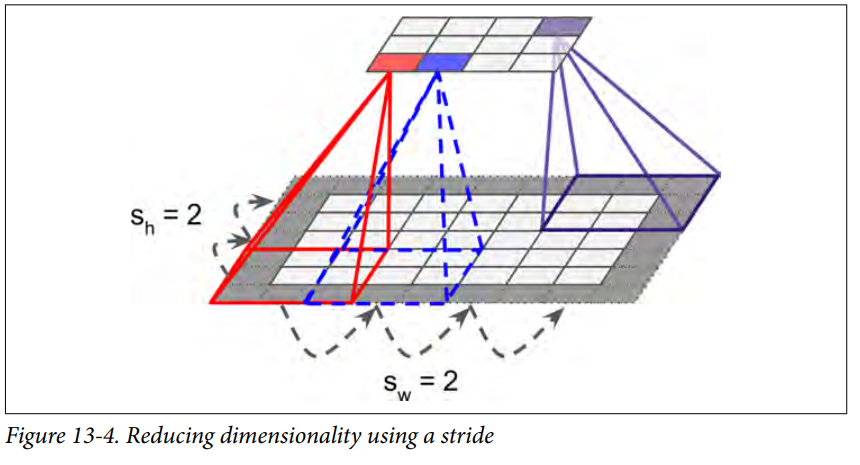

In [5]:
uploaded = files.upload()
im = Image.open(BytesIO(uploaded['Figure13-4.PNG']))
                                 
display(im)

**Filters**

Neuron's weights => a small image (the size of the receptive field) => **Filter** (convolution kernel)

A layer full of neurons using the same filter give you a **feature map**

Saving Figure13-5.PNG to Figure13-5.PNG


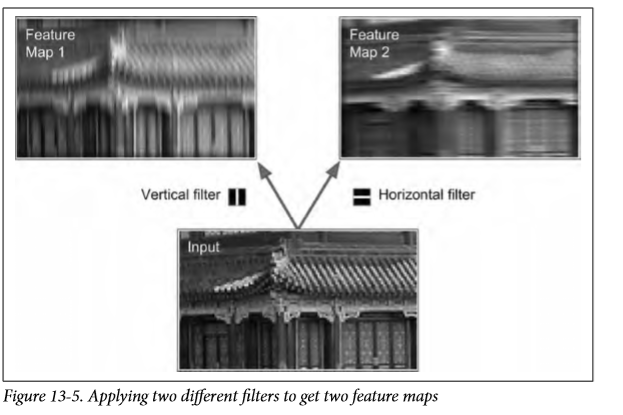

In [7]:
uploaded = files.upload()
im = Image.open(BytesIO(uploaded['Figure13-5.PNG']))
                                 
display(im)

**Stacking Multiple Feature Maps**

In reality, each convolution layer is composed of several feature maps of equal sizes.

A neuron located in row $i$, column $j$ **of the feature map $k$ ** in given convolution layer $l$ is connected to the outputs of the neurons in the previous layer $l-1$, located in rows $i$ x $s_w$ to $i$ x $s_w + f_w -1$ and columns $ j$ x $s_h$ to $j$ x $s_h + f_h -1$



---


Equation 13-1. Computing the output of a neuron in a convolutional layer

$z_{i,j,k} = b_k + \Sigma_{u=1}^{f_h} \Sigma_{v=1}^{f_w} \Sigma_{k'=1}^{f_{n'}} x_{i',j',k'} \cdot w_{u,v,k',k}$

with

$i' = u \cdot s_h + f_h -1$ and $j' = v \cdot s_w + f_w -1 $


Saving Figure13-6.PNG to Figure13-6.PNG


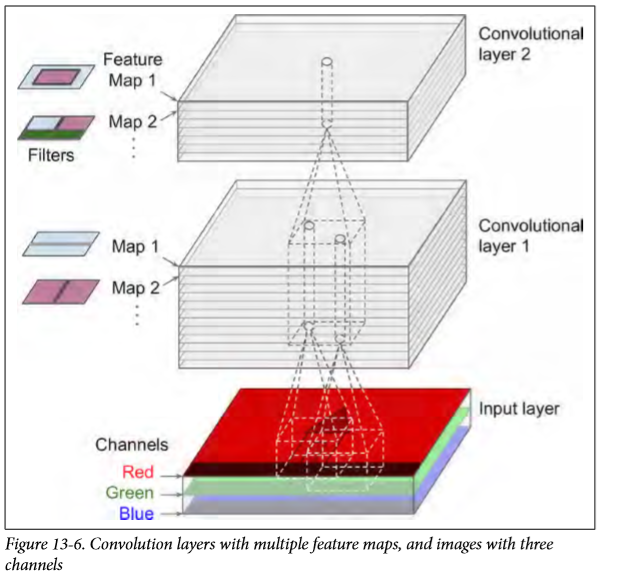

In [8]:
uploaded = files.upload()
im = Image.open(BytesIO(uploaded['Figure13-6.PNG']))
                                 
display(im)

**Tensorflow Implementation**

**Setup**

In [0]:
from __future__ import division, print_function, unicode_literals

import numpy as np
import os

def reset_graph(seed=42):
  tf.reset_default_graph()
  tf.set_random_seed(seed)
  np.random.seed(seed)
 
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

PROJECT_ROOT_DIR="."
CHAPTER_ID = "cnn"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [0]:
def plot_image(image):
  plt.imshow(image, cmap="gray", interpolation="nearest")
  plt.axis("off")
  
def plot_color_image(image):
  plt.imshow(image.astype(np.uint8), interpolation="nearest")
  plt.axis("off")

In [0]:
import tensorflow as tf

**Convolutional layer**

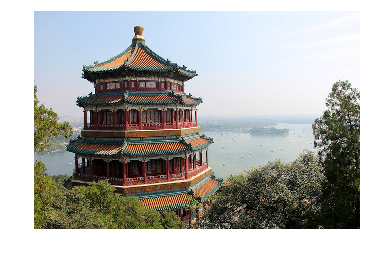

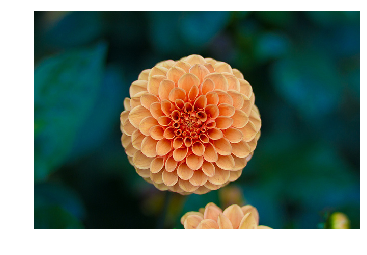

In [5]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
image = china[150:220, 130:250]
height, width, channels = image.shape
image_grayscale = image.mean(axis=2).astype(np.float32)
images = image_grayscale.reshape(1, height, width, 1)

plot_image(china)
plt.show()

plot_image(flower)
plt.show()

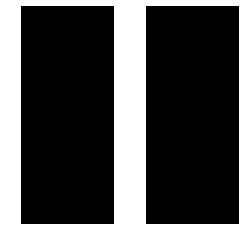

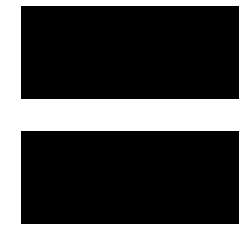

In [6]:
fmap = np.zeros(shape=(7, 7, 1, 2), dtype=np.float32)
fmap[:, 3, 0, 0] = 1
fmap[3, :, 0, 1] = 1
plot_image(fmap[:, :, 0, 0])
plt.show()
plot_image(fmap[:, :, 0, 1])
plt.show()

In [0]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, height, width, 1))
feature_maps = tf.constant(fmap)
convolution = tf.nn.conv2d(X, feature_maps, strides=[1,1,1,1], padding="SAME")

In [0]:
with tf.Session() as sess:
  output = convolution.eval(feed_dict={X: images})

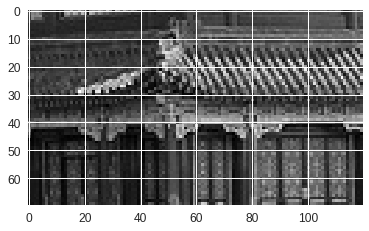

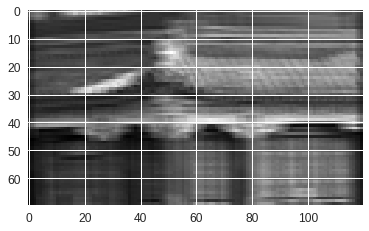

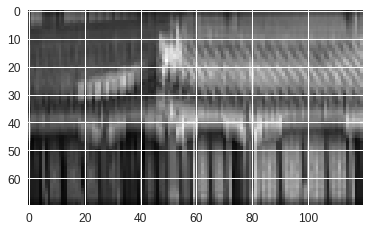

In [9]:
plt.imshow(images[0, :, :, 0], cmap="gray")
plt.show()

plt.imshow(output[0, :, :, 1], cmap="gray")
plt.show()

plt.imshow(output[0, :, :, 0], cmap="gray")
plt.show()

**Simple example**

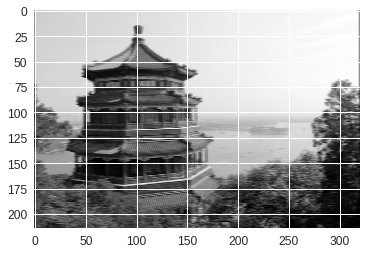

In [10]:
import numpy as np
from sklearn.datasets import load_sample_images

china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
dataset = np.array([china, flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape

filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1 #vertical
filters[3, :, :, 1] = 1 #horizontal

X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters, strides=[1, 2, 2, 1], padding="SAME")

with tf.Session() as sess:
  output = sess.run(convolution, feed_dict={X: dataset})

#plot first image's second feature map
plt.imshow(output[0, :, :, 1], cmap="gray")
plt.show()


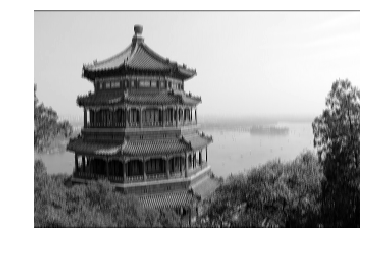

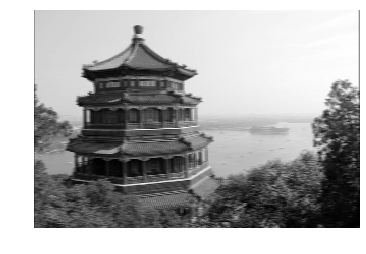

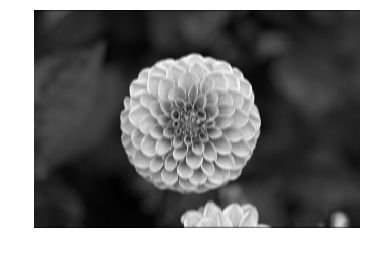

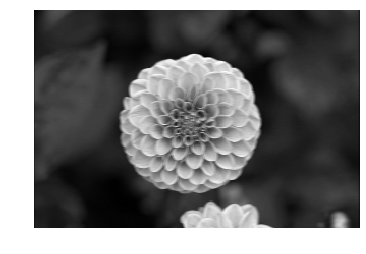

In [11]:
for image_index in (0, 1):
  for feature_map_index in (0, 1):
    plot_image(output[image_index, :, :, feature_map_index])
    plt.show()

In [0]:
reset_graph()

X = tf.placeholder(shape=(None, height, width, channels), dtype=tf.float32)
conv = tf.layers.conv2d(X, filters=2, kernel_size=7, strides=[2,2], padding="SAME")

In [0]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
  init.run()
  output = sess.run(conv, feed_dict={X: dataset})

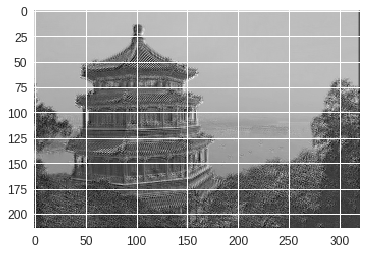

In [14]:
plt.imshow(output[0, :, :, 1], cmap="gray")
plt.show()

In [19]:
reset_graph()

filter_primes = np.array([2. , 3., 5., 7., 11., 13.], dtype=np.float32)
x = tf.constant(np.arange(1, 13+1, dtype=np.float32).reshape([1, 1, 13, 1]))
filters = tf.constant(filter_primes.reshape(1, 6, 1, 1))

valid_conv = tf.nn.conv2d(x, filters, strides=[1, 1, 5, 1], padding='VALID')
same_conv = tf.nn.conv2d(x, filters, strides=[1, 1, 5, 1], padding='SAME')

with tf.Session() as sess:
  print("VALID:\n", valid_conv.eval())
  print("SAME:\n", same_conv.eval())


VALID:
 [[[[184.]
   [389.]]]]
SAME:
 [[[[143.]
   [348.]
   [204.]]]]


In [33]:
print("VALID:")
print(np.array([1,2,3,4,5,6]).T.dot(filter_primes))
print(np.array([6,7,8,9,10,11]).T.dot(filter_primes))
print("SAME")
print(np.array([0,1,2,3,4,5]).T.dot(filter_primes))
print(np.array([5,6,7,8,9,10]).T.dot(filter_primes))
print(np.array([10,11,12,13,0,0]).T.dot(filter_primes))

VALID:
184.0
389.0
SAME
143.0
348.0
204.0


**Memory Requirements**

Convolutional layers require a huge amount of RAM (due to the backpropagation step)

For example,
 - a convolution layer with 5 x 5 filters
 - outputing 200 feature maps of size 150 x 100
 - with stride 1 and SAME padding.
 
 If the input is a 150 x 100 RGB image (3 channels) \\
=> the number of parameters \\
=> $(5 \times 5 \times 3 + 1) \times 200 = 15,200$
(fully connected layer : $150^2 \times 100^2 \times 3 = $ 675 million parameters)

However...

Each of the 200 feature maps contains $150 \times 100$ neurons.. \\
Each of these neurons needs to compute a wighted sum of its $5 \times 5 \times 3 = 75$ \\
=> 225 milion float multiplications => computationally intensive.

If the feature maps are represented using 32-bit floats \\
=> the convolutional layer's output: $200 \times 150 \times 100 \times 32$ = 96 million bits => about 11.4MB

If a training batch contains 100 instances... => over 1GB of RAM.


**Pooling layer**

Saving Figure13-7.PNG to Figure13-7.PNG


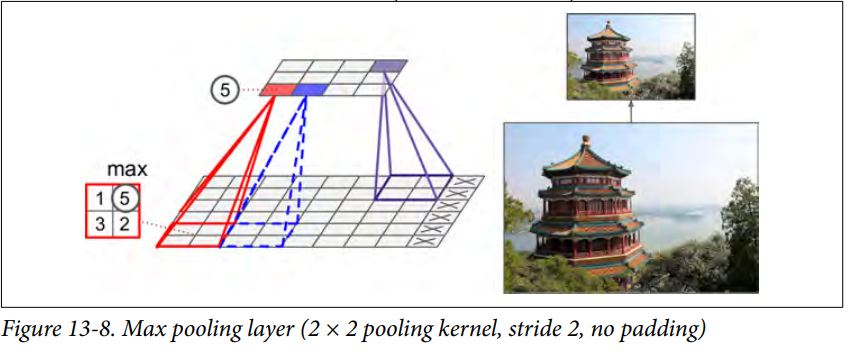

In [22]:
uploaded = files.upload()
im = Image.open(BytesIO(uploaded['Figure13-7.PNG']))
                                 
display(im)

In [0]:
batch_size, height, width, channels = dataset.shape

filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1
filters[3, :, :, 1] = 1

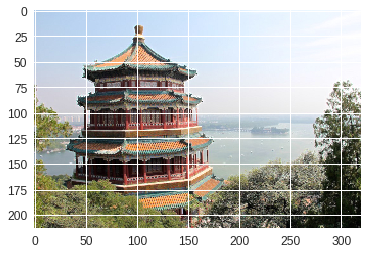

In [25]:
X=tf.placeholder(tf.float32, shape=(None, height, width, channels))
max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")

with tf.Session() as sess:
  output = sess.run(max_pool, feed_dict={X: dataset})
  
plt.imshow(output[0].astype(np.uint8))
plt.show()

819840


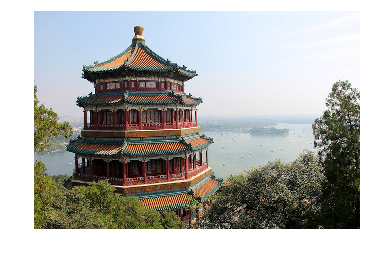

204480


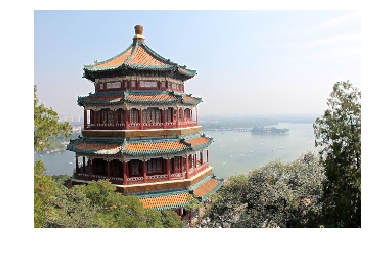

In [26]:
plot_color_image(dataset[0])
print(dataset[0].size)
plt.show()
    
plot_color_image(output[0])
print(output[0].size)
plt.show()

Saving Figure13-8.PNG to Figure13-8.PNG


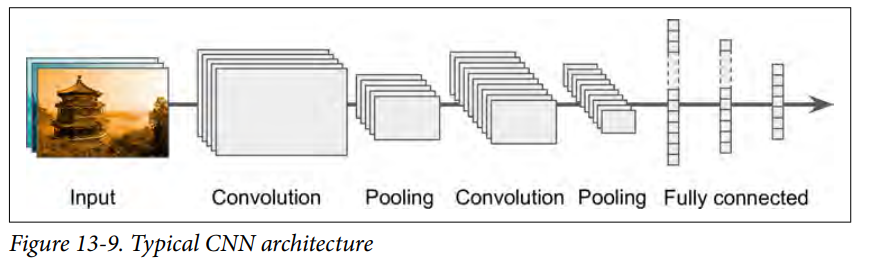

In [27]:
uploaded = files.upload()
im = Image.open(BytesIO(uploaded['Figure13-8.PNG']))
                                 
display(im)

**MNIST**


In [0]:
height = 28
width = 28
channels = 1
n_inputs = height * width

conv1_fmaps = 32
conv1_ksize = 3
conv1_stride = 1
conv1_pad = "SAME"

conv2_fmaps = 64
conv2_ksize = 3
conv2_stride = 2
conv2_pad = "SAME"

pool3_fmaps = conv2_fmaps

n_fc1 = 64
n_outputs = 10

reset_graph()

with tf.name_scope("inputs"):
  X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
  X_reshaped = tf.reshape(X, shape=[-1, height, width, channels])
  y = tf.placeholder(tf.int32, shape=[None], name="y")
  
conv1 = tf.layers.conv2d(X_reshaped, filters=conv1_fmaps, kernel_size=conv1_ksize,
                        strides=conv1_stride, padding=conv1_pad,
                        activation=tf.nn.relu, name="conv1")

conv2 = tf.layers.conv2d(conv1, filters=conv2_fmaps, kernel_size=conv2_ksize,
                        strides=conv2_stride, padding=conv2_pad,
                        activation=tf.nn.relu, name="conv2")

with tf.name_scope("pool3"):
  pool3 = tf.nn.max_pool(conv2, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding="VALID")
  pool3_flat = tf.reshape(pool3, shape=[-1, pool3_fmaps * 7 * 7])
  
with tf.name_scope("fc1"):
  fc1 = tf.layers.dense(pool3_flat, n_fc1, activation=tf.nn.relu, name="fc1")
  
with tf.name_scope("output"):
  logits = tf.layers.dense(fc1, n_outputs, name="output")
  Y_proba = tf.nn.softmax(logits, name="Y_proba")
  
with tf.name_scope("train"):
  xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
  loss = tf.reduce_mean(xentropy)
  optimizer = tf.train.AdamOptimizer()
  training_op = optimizer.minimize(loss)
  
with tf.name_scope("eval1"):
  correct = tf.nn.in_top_k(logits, y, 1)
  accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
  
with tf.name_scope("init_and_save"):
  init = tf.global_variables_initializer()
  saver = tf.train.Saver()


  

In [38]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [39]:
n_epochs = 10
batch_size = 100

with tf.Session() as sess:
  init.run()
  for epoch in range(n_epochs):
    for iteration in range(mnist.train.num_examples // batch_size):
      X_batch, y_batch = mnist.train.next_batch(batch_size)
      sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
    acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
    acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
    print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)
    
    save_path = saver.save(sess, "./my_mnist_model")

0 Train accuracy: 0.99 Test accuracy: 0.9777
1 Train accuracy: 0.96 Test accuracy: 0.9802
2 Train accuracy: 0.99 Test accuracy: 0.9867
3 Train accuracy: 1.0 Test accuracy: 0.9878
4 Train accuracy: 1.0 Test accuracy: 0.9878
5 Train accuracy: 0.99 Test accuracy: 0.9913
6 Train accuracy: 1.0 Test accuracy: 0.9886
7 Train accuracy: 1.0 Test accuracy: 0.9884
8 Train accuracy: 1.0 Test accuracy: 0.9891
9 Train accuracy: 1.0 Test accuracy: 0.9872
